# Weather Source Dark-sky Product Comparison for Weather Atrribute (1st June - 20th June) (Historical Weather Data)

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re #regukar expression
import warnings
import pytz #date-time conversion
import requests #to get info from server
import time
import datetime as dt
import json

from pandas.io.json import json_normalize
from IPython.display import display
from datetime import datetime
from pandas.io.json import json_normalize
from datetime import date, timedelta
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  #ignores the warning message and code runs faster # default='warn'

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.2f}'.format

from IPython.display import display
from IPython.display import HTML
import geopy.distance
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# **Get Points History**

Description : Returns a collection of weather history data for a latitude/longitude point.

Our patented OnPoint™ weather data is not confined to weather station locations, but is computed by overlaying multiple past weather sources (including weather station, satellite, radar, weather balloon, and model data – among others). The resulting quality-checked, error-corrected, gap-filled, and contiguous data is uniquely derived for possible every latitude/longitude location. This resource is globally available, everywhere there is landmass (except Antartica), for 2007 onward.

Requires a subscription plan with the “read_history” and “access_points” capabilities to access this resource.

Resource URL : https://api.weathersource.com/v1/{{api_key}}/points/{{latitude}},{{longitude}}/history.{{format}}

Documentation Used : https://developer.weathersource.com/documentation/resources/get-points-latitude_and_longitude-history/

In [2]:
def ws_historical_data(start, end, lat, long, period='day', fields='all'):
    '''
    If duration is more than 1 year separate calls should be used
    Timestamp should be converted to ISO 8601 format
    Docstring with examples and function return values:
    
    Input :
    start - (%Y-%m-%d) format
    end - (%Y-%m-%d) format
    lat - latitude 
    long - longitude
    period - hour, day (default=day)
    
    Output : return a callection of weather historical data for a latitude/longitude point
    
    '''
    key = 'e721181f854ac2268ee8'
    start = pd.to_datetime(start,format='%Y-%m-%d')
    end = pd.to_datetime(end, format='%Y-%m-%d')
    
    start = start.strftime('%Y-%m-%dT%H:%M:%S')
    end = end.strftime('%Y-%m-%dT%H:%M:%S')
    
    weather_ = pd.DataFrame()
    link = 'https://api.weathersource.com/v1/'+key+'/points/'+lat+','+long+'/history.json?period='+period+'&timestamp_between='+start+','+end+'&fields='+fields
    print(link)
    response = requests.get(link)
    json_obj = json.loads(response.content.decode('utf-8'))
    weather_ = json_normalize(json_obj)
    
    return weather_

#  Dark-sky : https://darksky.net/dev/docs

In [3]:
def getdarkskydatadaily(start,end,loc_name):
    """
    
    Input - start_date, end_date, API KEY from https://darksky.net/dev/register (now closed APPLE has acqired darksky)
    Output -daily level weather data from start date to end date for specified location
    
    """
    #api_key = '12ea26d5539f1add37b448b7db20f6b8'
    api_key ='03f7d7221972645470c7e8c6f35edd85'
    headers = {'User-Agent': 'Chrome/78and.0.3865.90'}
    http_proxy  = "http://10.245.5.249:8080"
    https_proxy = "https://10.245.5.249:8080"
    ftp_proxy   = "ftp://10.245.5.249:8080"

    proxyDict = { 
                "http"  : http_proxy, 
                "https" : https_proxy, 
                "ftp"   : ftp_proxy
                 }
    
    weather_data_daily = pd.DataFrame()
    date_list = []
    
    # get month,year and day from start date
    start_date = dt.datetime.strptime(start, "%Y-%m-%d")
    start_month = start_date.month
    start_year = start_date.year
    start_day = start_date.day
    
    # get month,year and day from end date
    end_date = dt.datetime.strptime(end, "%Y-%m-%d")
    end_month = end_date.month
    end_year = end_date.year
    end_day = end_date.day
    
    # store all date from start date to end date in date list 
    start_date = date(start_year, start_month, start_day)
    end_date = date(end_year, end_month, end_day)
    delta = timedelta(days=1)
    
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += delta
    
    # latitude of the location markers
    sites_latitude = {
        'Marker 1' : '39.9613','Marker 2' : '39.8971','Marker 3' : '39.9060','Marker 4' : '39.9024','Marker 5' : '39.8960','Marker 6' : '39.8339',
        'Marker 7' : '39.8412','Marker 8' : '39.8381','Marker 9' : '39.8386','Marker 10' : '39.7579','Marker 11' : '39.7621','Marker 12' : '39.7621',
        'Marker 13' : '39.7695','Marker 14' : '39.6617','Marker 15' : '39.6639','Marker 16' : '39.6702','Marker 17' : '39.6744','Marker 18' : '39.5909',
        'Marker 19' : '39.5295','Marker 20' : '39.5475'
    }
    
    # longitude of the location markers
    sites_longitude = {
        'Marker 1' : '-86.4034','Marker 2' : '-86.3045','Marker 3' : '-86.2001','Marker 4' : '-86.0738','Marker 5' : '-85.9783','Marker 6' : '-86.3155',
        'Marker 7' : '-86.2056','Marker 8' : '-86.0985','Marker 9' : '-85.9811','Marker 10' : '-86.3155','Marker 11' : '-86.2042','Marker 12' : '-86.0923',
        'Marker 13' : '-85.9708','Marker 14' : '-86.2935','Marker 15' : '-86.1823','Marker 16' : '-86.0669','Marker 17' : '-85.9557','Marker 18' : '-86.4212',
        'Marker 19' : '-86.5874','Marker 20' : '-86.2743'
    }
    
    value1 = sites_latitude.get(loc_name)
    value2 = sites_longitude.get(loc_name)
    if(value1 == None and value2 == None):
        print('Unknown Location Name Used: %s',loc_name)
        print('\n')
        print('Use some other Consumer Location or Generation Location Name.. .. ..')
        print('\n')
    else :
        for i in range(len(date_list)):
            #requesting web page
            date_format = '%Y-%m-%dT%H:%M:%S'
            dates = dt.datetime.strptime(date_list[i], '%Y-%m-%d').strftime(date_format)
            links = 'https://api.darksky.net/forecast/'+api_key+'/'+sites_latitude.get(loc_name)+','+sites_longitude.get(loc_name)+','+str(dates)+'?exclude=currently,hourly,alerts?units=us'
            print(links)
            response = requests.get(links,headers=headers,proxies=proxyDict)

            # converting into json
            weather = json.loads(response.content.decode('utf-8'))
            # getting it into data frame
            weather_data = json_normalize(weather['daily']['data'])
            weather_data_daily = weather_data_daily.append(weather_data,sort=True)
    
    weather_data_daily.reset_index(drop=True, inplace=True)
    
    return weather_data_daily

In [4]:
start_date = "2020-06-01"
end_date = "2020-06-20"
location = ('39.9613', '-86.4034')
location_marker = 'Marker 1'

weathersource_data = ws_historical_data(start=start_date, end=end_date, lat=location[0], long=location[1], period='day')
darksky_data = getdarkskydatadaily(start_date,end_date,location_marker)

https://api.weathersource.com/v1/e721181f854ac2268ee8/points/39.9613,-86.4034/history.json?period=day&timestamp_between=2020-06-01T00:00:00,2020-06-20T00:00:00&fields=all
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-01T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-02T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-03T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-04T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-05T00:00:00?exclude=currently,hourly,alerts?units=us
https://api.darksky.net/forecast/03f7d7221972645470c7e8c6f35edd85/39.9613,-86.4034,2020-06-06T00:00:00?exclud

In [5]:
weathersource_data['date_time'] = pd.to_datetime(weathersource_data['timestamp'])
weathersource_data['Date'] = weathersource_data['date_time'].dt.date

########################################################################################################################################################################################################################
########################################################################################################################################################################################################################

darksky_data['date_time'] = pd.to_datetime(darksky_data['time'],unit='s')
darksky_data['date_time']=darksky_data['date_time'].astype(str)
 
#shift data from gmt to est time
def date_convert(date):
    date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    my_timestamp = date # some timestamp
    old_timezone = pytz.timezone("GMT")
    new_timezone = pytz.timezone("US/Eastern")

    # returns datetime in the new timezone
    my_timestamp_in_new_timezone = old_timezone.localize(my_timestamp).astimezone(new_timezone)
    return pd.to_datetime(my_timestamp_in_new_timezone)
 
darksky_data['date_time'] = darksky_data.apply(lambda x: date_convert(x['date_time']),axis=1)
darksky_data['Date'] = darksky_data['date_time'].dt.date

In [6]:
print('\n')
print('\n')
display(weathersource_data.head())
print('\n')
print('\n')
print('\n')
print('\n')
display(darksky_data.head())

,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,date_time,Date
0,12,68,0,47.60,53.70,43.60,62.10,71.60,47.80,62.30,71.60,48.20,39.96,-86.40,1022.60,1025.80,1017.10,0.02,-0.30,0.80,-1.30,357.20,1014.90,0,8572.00,60.80,85.90,39.30,989.10,992.30,984.70,0,0,7.20,9.00,6.10,62.30,71.60,48.20,2020-06-01T00:00:00-04:00,54.40,60.00,46.10,62.10,71.60,47.80,182,181,178,10.00,24.50,4.70,9.40,22.50,2.40,5.30,10.40,0.20,2020-06-01 00:00:00-04:00,2020-06-01
1,7,76,0,56.10,62.10,48.90,75.10,87.40,59.20,75.20,87.40,59.80,39.96,-86.40,1014.00,1017.50,1011.10,0.00,-0.20,0.60,-0.60,354.80,986.00,0,8515.70,53.70,69.10,37.90,981.50,984.20,979.00,0,0,10.10,12.40,7.50,74.60,87.20,59.80,2020-06-02T00:00:00-04:00,63.30,69.40,54.20,74.60,87.20,59.20,235,234,233,23.20,28.40,19.30,21.70,26.50,19.40,11.90,17.10,6.50,2020-06-02 00:00:00-04:00,2020-06-02
2,46,100,0,65.20,69.40,58.60,77.30,90.60,68.20,77.30,90.60,68.20,39.96,-86.40,1009.80,1011.80,1007.20,0.17,-0.10,1.30,-1.00,302.30,981.30,0,7253.80,71.10,93.70,48.90,977.20,979.50,974.80,0,0,13.80,15.90,10.80,75.80,87.50,68.20,2020-06-03T00:00:00-04:00,68.70,73.50,63.30,75.80,87.50,68.20,256,251,249,13.10,28.30,2.50,13.30,27.10,3.20,8.30,12.20,1.80,2020-06-03 00:00:00-04:00,2020-06-03
3,68,100,2,66.80,69.40,62.60,73.90,85.10,65.30,73.90,85.10,65.30,39.96,-86.40,1008.90,1009.70,1006.90,0.45,0.00,1.20,-1.50,300.00,926.90,0,7201.10,82.80,96.80,62.90,975.90,977.20,973.80,0,0,14.50,15.90,12.50,72.60,81.80,65.30,2020-06-04T00:00:00-04:00,68.60,72.20,63.70,72.60,81.80,65.30,263,270,243,7.40,15.40,1.60,8.00,17.80,1.60,5.30,13.00,0.50,2020-06-04 00:00:00-04:00,2020-06-04
4,37,100,0,66.60,68.20,64.70,77.40,87.70,65.80,77.40,87.70,65.80,39.96,-86.40,1011.10,1012.40,1009.30,0.00,0.10,1.00,-0.50,320.50,975.80,0,7693.00,75.20,96.90,54.60,978.60,980.10,976.90,0,0,14.40,15.30,13.40,75.80,84.30,65.80,2020-06-05T00:00:00-04:00,69.50,72.80,65.10,75.80,84.30,65.80,266,266,252,8.40,12.70,3.40,9.00,13.00,3.40,5.90,9.90,2.80,2020-06-05 00:00:00-04:00,2020-06-05


,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,humidity,icon,moonPhase,ozone,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed,date_time,Date
0,75.16,1591041000,60.41,1591091160,75.16,1591041000,47.54,1591008120,0.17,47.94,0.61,clear-day,0.36,314.80,0.00,0.00,1591063440,0.07,rain,1024.10,Clear throughout the day.,1591006800,1591060200,75.66,1591041000,59.92,1591091160,75.66,1591041000,48.67,1591007220,1590984000,9,1591033800,10.00,169,16.24,1591066800,5.81,2020-06-01 00:00:00-04:00,2020-06-01
1,88.29,1591127460,67.76,1591177620,88.29,1591127460,60.41,1591091160,0.12,58.07,0.57,clear-day,0.40,311.00,0.00,0.00,1591146120,0.05,rain,1015.40,Clear throughout the day.,1591093200,1591146660,88.04,1591128120,66.71,1591177620,88.04,1591128120,59.92,1591091160,1591070400,10,1591120200,10.00,232,29.93,1591103400,11.96,2020-06-02 00:00:00-04:00,2020-06-02
2,91.55,1591207440,66.63,1591264320,91.55,1591207440,67.76,1591177620,0.47,67.28,0.73,rain,0.43,308.90,0.01,0.04,1591228620,0.33,rain,1010.70,Possible light rain overnight.,1591179540,1591233060,87.36,1591207800,64.99,1591264080,87.36,1591207800,66.71,1591177620,1591156800,8,1591203420,10.00,249,25.52,1591164060,8.91,2020-06-03 00:00:00-04:00,2020-06-03
3,85.61,1591300200,67.20,1591350480,85.61,1591300200,66.63,1591264320,0.81,68.34,0.84,rain,0.47,314.10,0.02,0.26,1591264740,0.81,rain,1009.10,Heavy rain in the morning and afternoon.,1591265940,1591319520,83.03,1591300500,65.53,1591350600,83.03,1591300500,64.99,1591264080,1591243200,6,1591290180,10.00,250,16.71,1591250580,5.62,2020-06-04 00:00:00-04:00,2020-06-04
4,88.51,1591386540,68.52,1591437180,88.51,1591386540,67.20,1591350480,0.42,68.15,0.79,partly-cloudy-day,0.51,307.20,0.00,0.00,1591350600,0.09,rain,1011.60,Partly cloudy throughout the day.,1591352340,1591405980,86.02,1591386840,66.78,1591437240,86.02,1591386840,65.53,1591350600,1591329600,8,1591375200,9.84,257,12.52,1591401120,5.52,2020-06-05 00:00:00-04:00,2020-06-05


In [7]:
weathersource_data.drop(['date_time'],axis=1,inplace=True)
darksky_data.drop(['date_time'],axis=1,inplace=True)

In [8]:
merged_data = pd.merge(weathersource_data,darksky_data, on=['Date'], how='left')
merged_data.head()

,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,Date,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,humidity,icon,moonPhase,ozone,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,12,68,0,47.60,53.70,43.60,62.10,71.60,47.80,62.30,71.60,48.20,39.96,-86.40,1022.60,1025.80,1017.10,0.02,-0.30,0.80,-1.30,357.20,1014.90,0,8572.00,60.80,85.90,39.30,989.10,992.30,984.70,0,0,7.20,9.00,6.10,62.30,71.60,48.20,2020-06-01T00:00:00-04:00,54.40,60.00,46.10,62.10,71.60,47.80,182,181,178,10.00,24.50,4.70,9.40,22.50,2.40,5.30,10.40,0.20,2020-06-01,75.16,1591041000,60.41,1591091160,75.16,1591041000,47.54,1591008120,0.17,47.94,0.61,clear-day,0.36,314.80,0.00,0.00,1591063440,0.07,rain,1024.10,Clear throughout the day.,1591006800,1591060200,75.66,1591041000,59.92,1591091160,75.66,1591041000,48.67,1591007220,1590984000,9,1591033800,10.00,169,16.24,1591066800,5.81
1,7,76,0,56.10,62.10,48.90,75.10,87.40,59.20,75.20,87.40,59.80,39.96,-86.40,1014.00,1017.50,1011.10,0.00,-0.20,0.60,-0.60,354.80,986.00,0,8515.70,53.70,69.10,37.90,981.50,984.20,979.00,0,0,10.10,12.40,7.50,74.60,87.20,59.80,2020-06-02T00:00:00-04:00,63.30,69.40,54.20,74.60,87.20,59.20,235,234,233,23.20,28.40,19.30,21.70,26.50,19.40,11.90,17.10,6.50,2020-06-02,88.29,1591127460,67.76,1591177620,88.29,1591127460,60.41,1591091160,0.12,58.07,0.57,clear-day,0.40,311.00,0.00,0.00,1591146120,0.05,rain,1015.40,Clear throughout the day.,1591093200,1591146660,88.04,1591128120,66.71,1591177620,88.04,1591128120,59.92,1591091160,1591070400,10,1591120200,10.00,232,29.93,1591103400,11.96
2,46,100,0,65.20,69.40,58.60,77.30,90.60,68.20,77.30,90.60,68.20,39.96,-86.40,1009.80,1011.80,1007.20,0.17,-0.10,1.30,-1.00,302.30,981.30,0,7253.80,71.10,93.70,48.90,977.20,979.50,974.80,0,0,13.80,15.90,10.80,75.80,87.50,68.20,2020-06-03T00:00:00-04:00,68.70,73.50,63.30,75.80,87.50,68.20,256,251,249,13.10,28.30,2.50,13.30,27.10,3.20,8.30,12.20,1.80,2020-06-03,91.55,1591207440,66.63,1591264320,91.55,1591207440,67.76,1591177620,0.47,67.28,0.73,rain,0.43,308.90,0.01,0.04,1591228620,0.33,rain,1010.70,Possible light rain overnight.,1591179540,1591233060,87.36,1591207800,64.99,1591264080,87.36,1591207800,66.71,1591177620,1591156800,8,1591203420,10.00,249,25.52,1591164060,8.91
3,68,100,2,66.80,69.40,62.60,73.90,85.10,65.30,73.90,85.10,65.30,39.96,-86.40,1008.90,1009.70,1006.90,0.45,0.00,1.20,-1.50,300.00,926.90,0,7201.10,82.80,96.80,62.90,975.90,977.20,973.80,0,0,14.50,15.90,12.50,72.60,81.80,65.30,2020-06-04T00:00:00-04:00,68.60,72.20,63.70,72.60,81.80,65.30,263,270,243,7.40,15.40,1.60,8.00,17.80,1.60,5.30,13.00,0.50,2020-06-04,85.61,1591300200,67.20,1591350480,85.61,1591300200,66.63,1591264320,0.81,68.34,0.84,rain,0.47,314.10,0.02,0.26,1591264740,0.81,rain,1009.10,Heavy rain in the morning and afternoon.,1591265940,1591319520,83.03,1591300500,65.53,1591350600,83.03,1591300500,64.99,1591264080,1591243200,6,1591290180,10.00,250,16.71,1591250580,5.62
4,37,100,0,66.60,68.

# Comparison Plots

## **Weather Source Dark-sky Wind Speed Comparison**

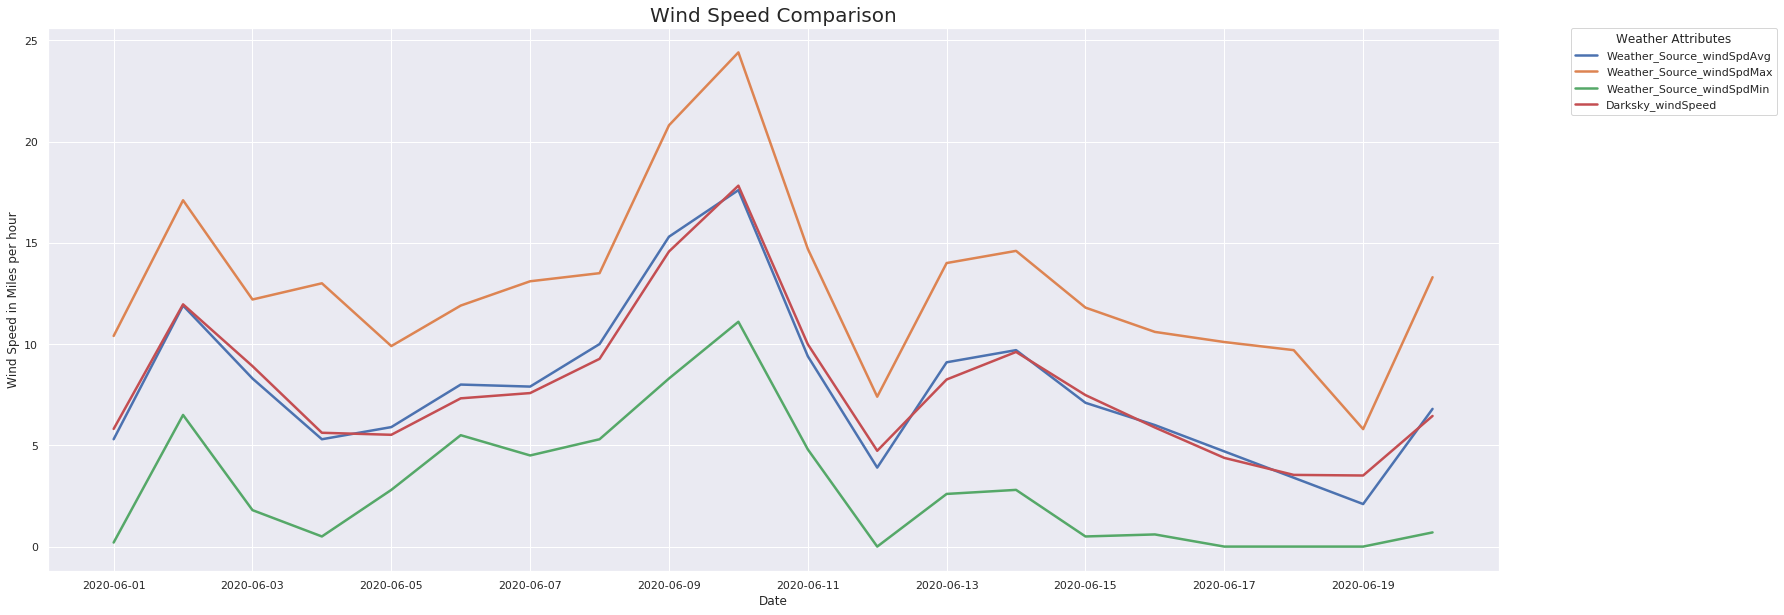

In [9]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'windSpeed']], ['Date']))
    new_labels = ['Weather_Source_windSpdAvg', 'Weather_Source_windSpdMax', 'Weather_Source_windSpdMin', 'Darksky_windSpeed']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Speed in Miles per hour',title="Wind Speed Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

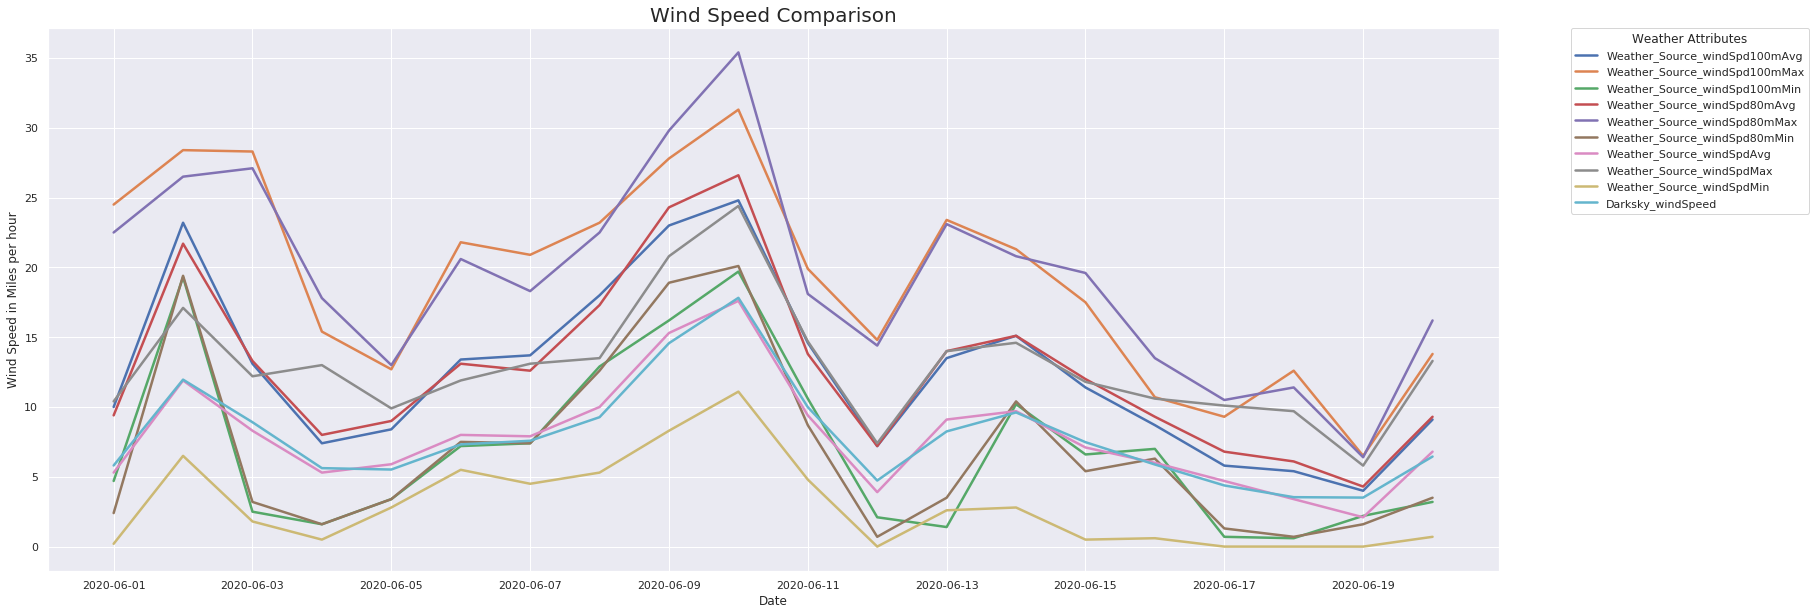

In [10]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','windSpd100mAvg','windSpd100mMax','windSpd100mMin','windSpd80mAvg', 'windSpd80mMax', 'windSpd80mMin', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'windSpeed']], ['Date']))
    new_labels = ["Weather_Source_windSpd100mAvg","Weather_Source_windSpd100mMax","Weather_Source_windSpd100mMin","Weather_Source_windSpd80mAvg", "Weather_Source_windSpd80mMax", "Weather_Source_windSpd80mMin",
                  'Weather_Source_windSpdAvg', 'Weather_Source_windSpdMax', 'Weather_Source_windSpdMin', 'Darksky_windSpeed']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Speed in Miles per hour',title="Wind Speed Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## **Weather Source Dark-sky Wind Direction Comparison**

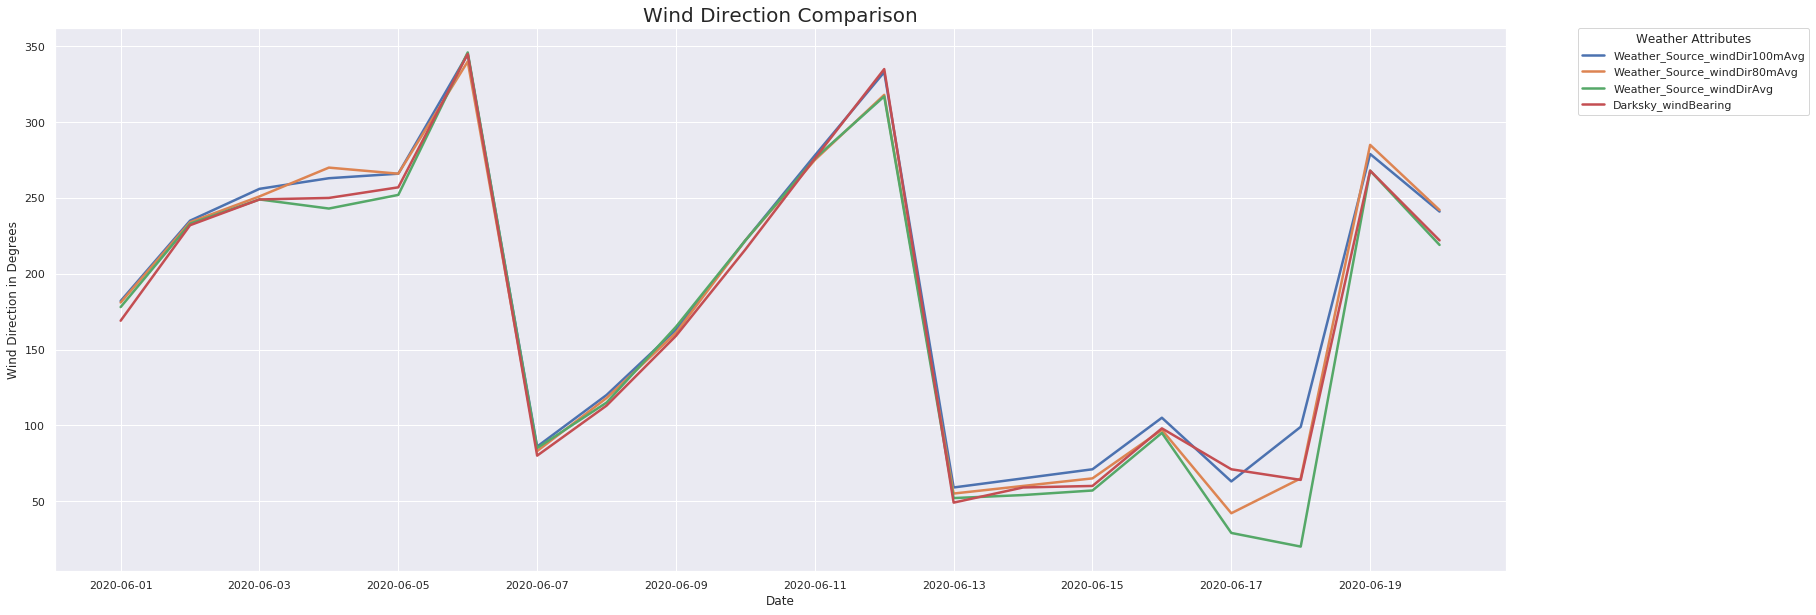

In [11]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','windDir100mAvg','windDir80mAvg','windDirAvg','windBearing']], ['Date']))
    new_labels = ['Weather_Source_windDir100mAvg', 'Weather_Source_windDir80mAvg', 'Weather_Source_windDirAvg', 'Darksky_windBearing']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Direction in Degrees',title="Wind Direction Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## **Weather Source Dark-sky Temperature Comparison**

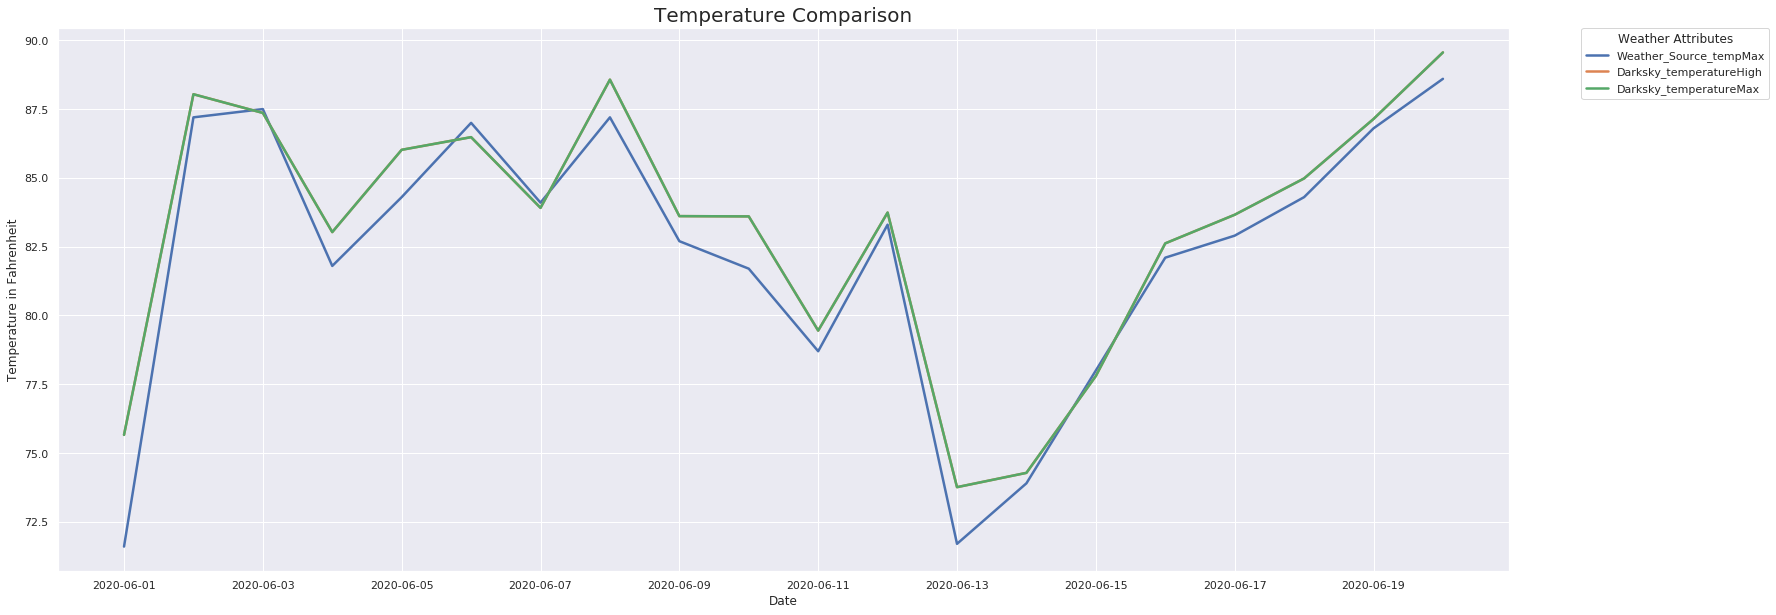

In [12]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempMax', 'temperatureHigh', 'temperatureMax']], ['Date']))
    new_labels = ['Weather_Source_tempMax', 'Darksky_temperatureHigh','Darksky_temperatureMax']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

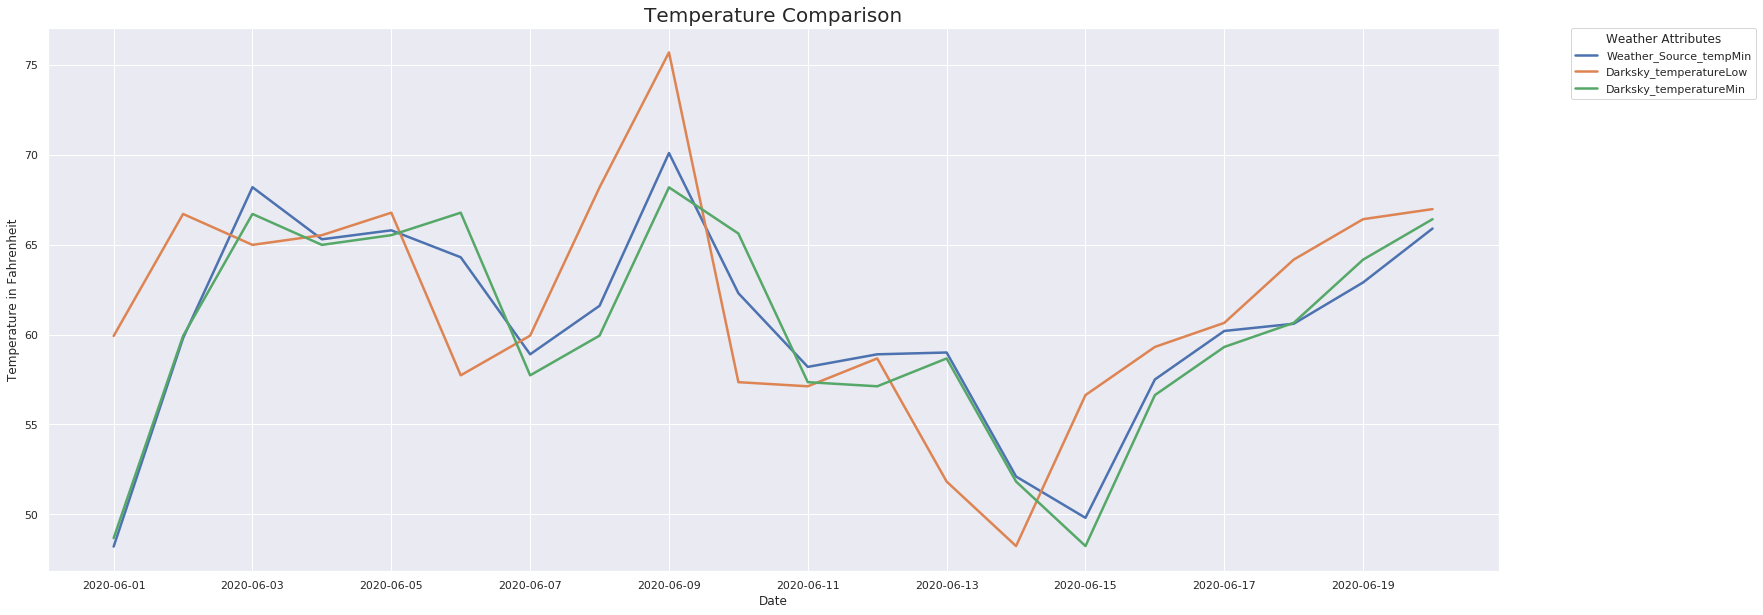

In [13]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempMin', 'temperatureLow', 'temperatureMin']], ['Date']))
    new_labels = ['Weather_Source_tempMin', 'Darksky_temperatureLow','Darksky_temperatureMin']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

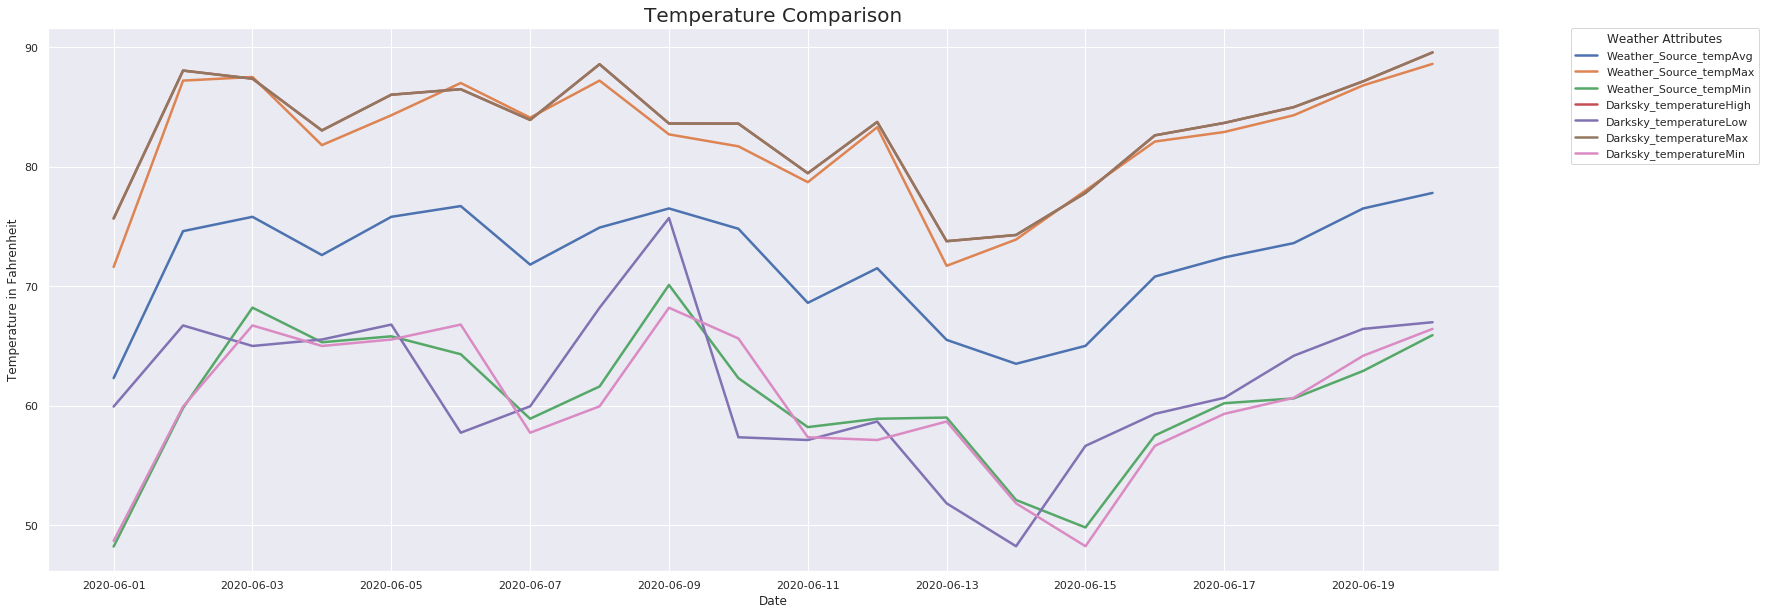

In [14]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempAvg','tempMax','tempMin','temperatureHigh', 'temperatureLow', 'temperatureMax', 'temperatureMin']], ['Date']))
    new_labels = ['Weather_Source_tempAvg', 'Weather_Source_tempMax', 'Weather_Source_tempMin', 'Darksky_temperatureHigh', 'Darksky_temperatureLow', 'Darksky_temperatureMax', 'Darksky_temperatureMin']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## **Weather Source Dark-sky CloudCover Comparison**

In [15]:
# bring cloud-cover to equal scale
merged_data['cloudCover'] = merged_data['cloudCover']*100

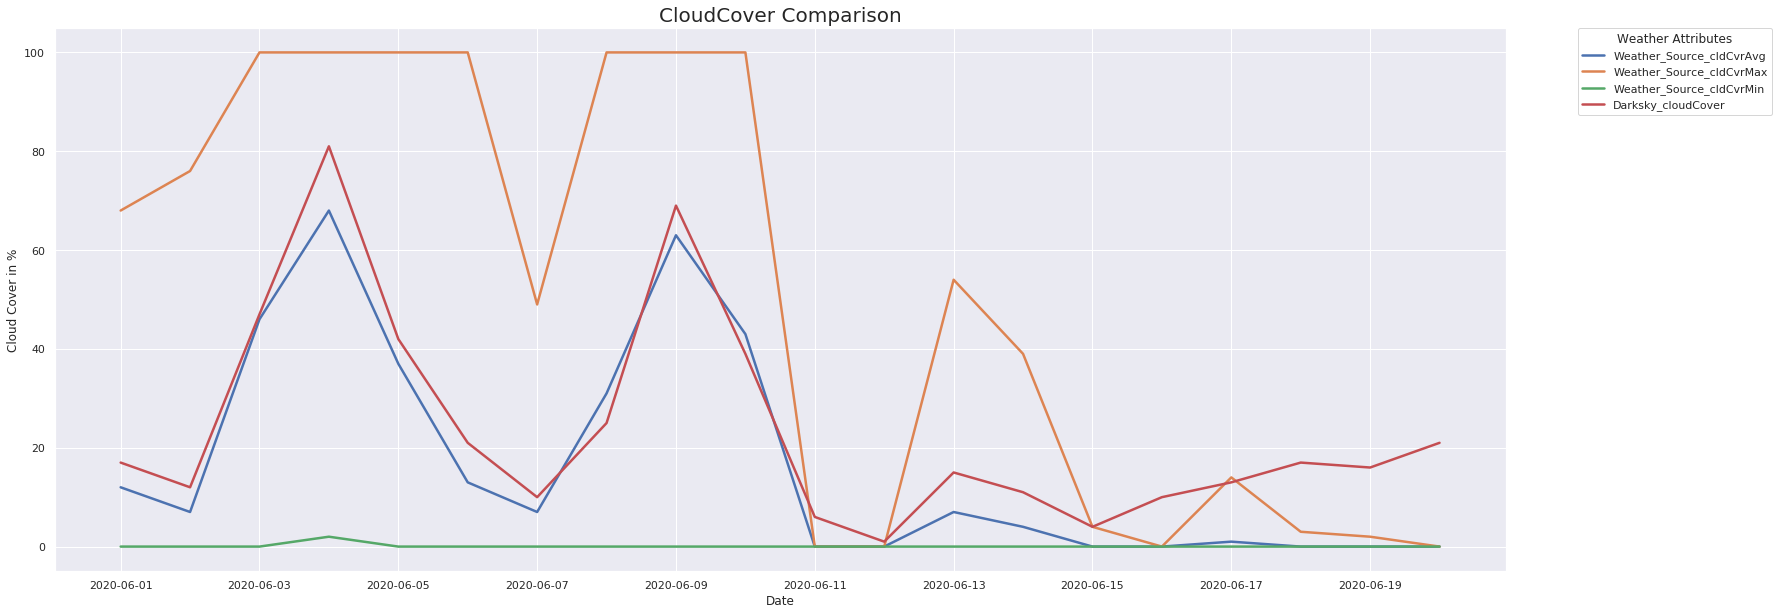

In [16]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','cldCvrAvg','cldCvrMax','cldCvrMin','cloudCover']], ['Date']))
    new_labels = ["Weather_Source_cldCvrAvg","Weather_Source_cldCvrMax","Weather_Source_cldCvrMin","Darksky_cloudCover"]
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Cloud Cover in %',title="CloudCover Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Weather Attributes',labels=new_labels)

## **Weather Source Dark-sky Apparent Temperature Comparison**

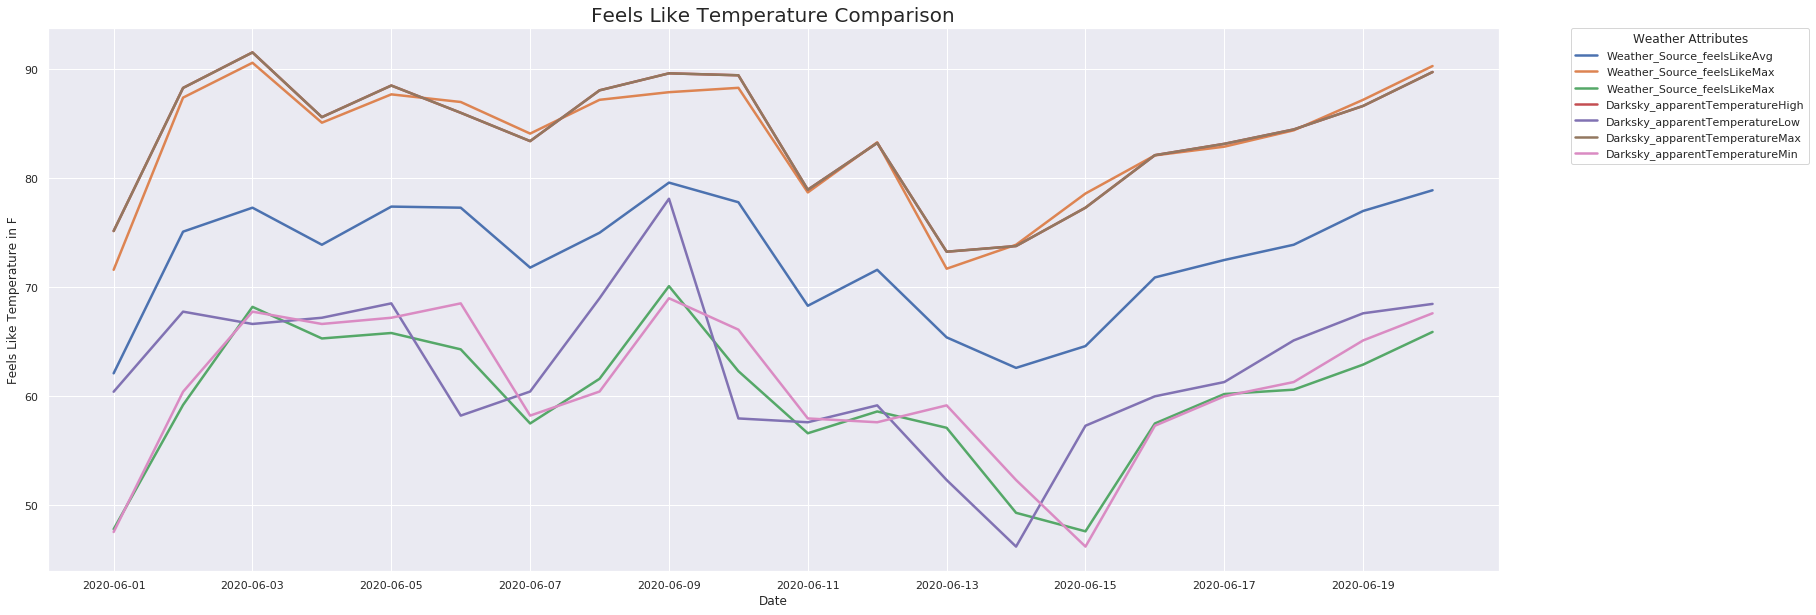

In [17]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','feelsLikeAvg','feelsLikeMax','feelsLikeMin','apparentTemperatureHigh','apparentTemperatureLow', 'apparentTemperatureMax', 'apparentTemperatureMin']], ['Date']))
    new_labels = ["Weather_Source_feelsLikeAvg","Weather_Source_feelsLikeMax","Weather_Source_feelsLikeMax","Darksky_apparentTemperatureHigh","Darksky_apparentTemperatureLow", "Darksky_apparentTemperatureMax", "Darksky_apparentTemperatureMin"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Feels Like Temperature in F',title="Feels Like Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## **Weather Source Dark-sky Dewpoint Comparison**

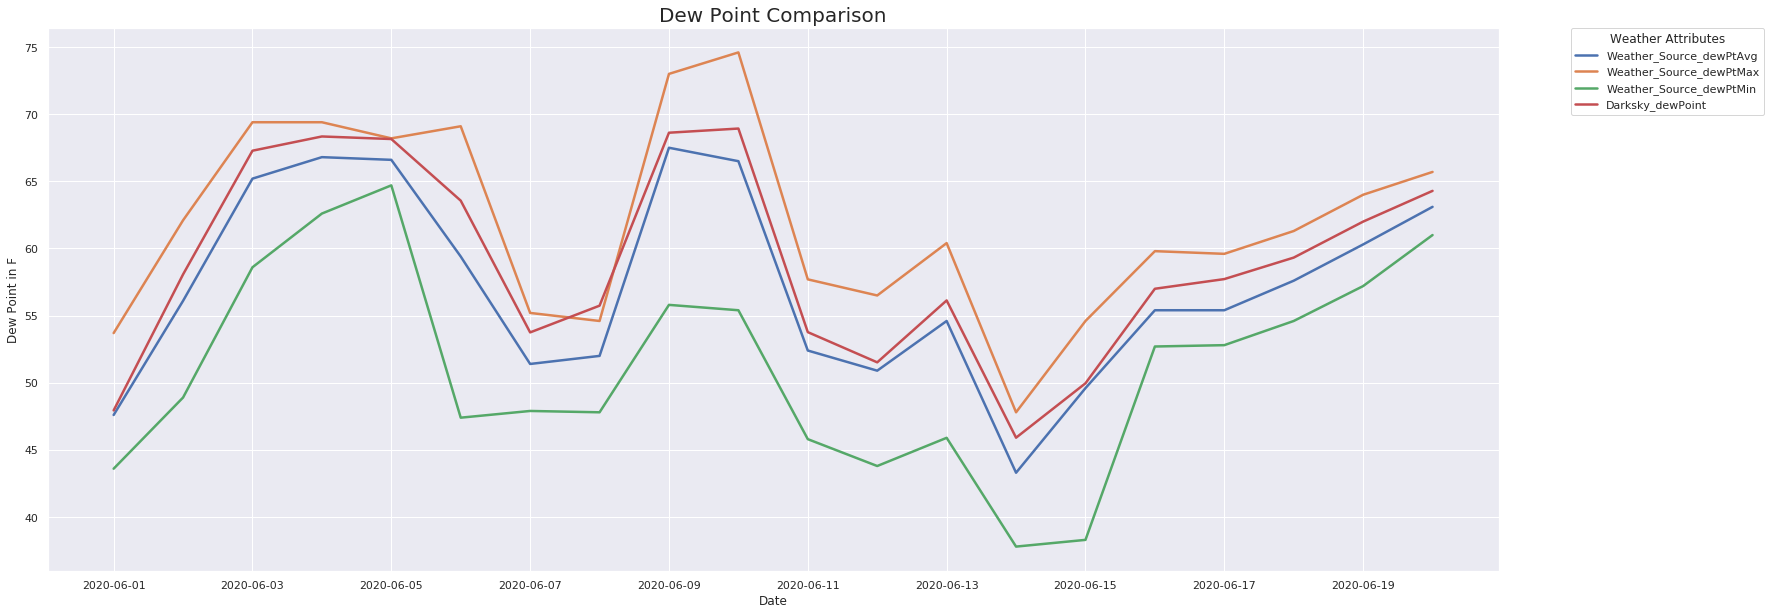

In [18]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','dewPtAvg', 'dewPtMax', 'dewPtMin', 'dewPoint']], ['Date']))
    new_labels = ["Weather_Source_dewPtAvg","Weather_Source_dewPtMax","Weather_Source_dewPtMin","Darksky_dewPoint"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Dew Point in F',title="Dew Point Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## **Weather Source Dark-sky Pressure Comparison**

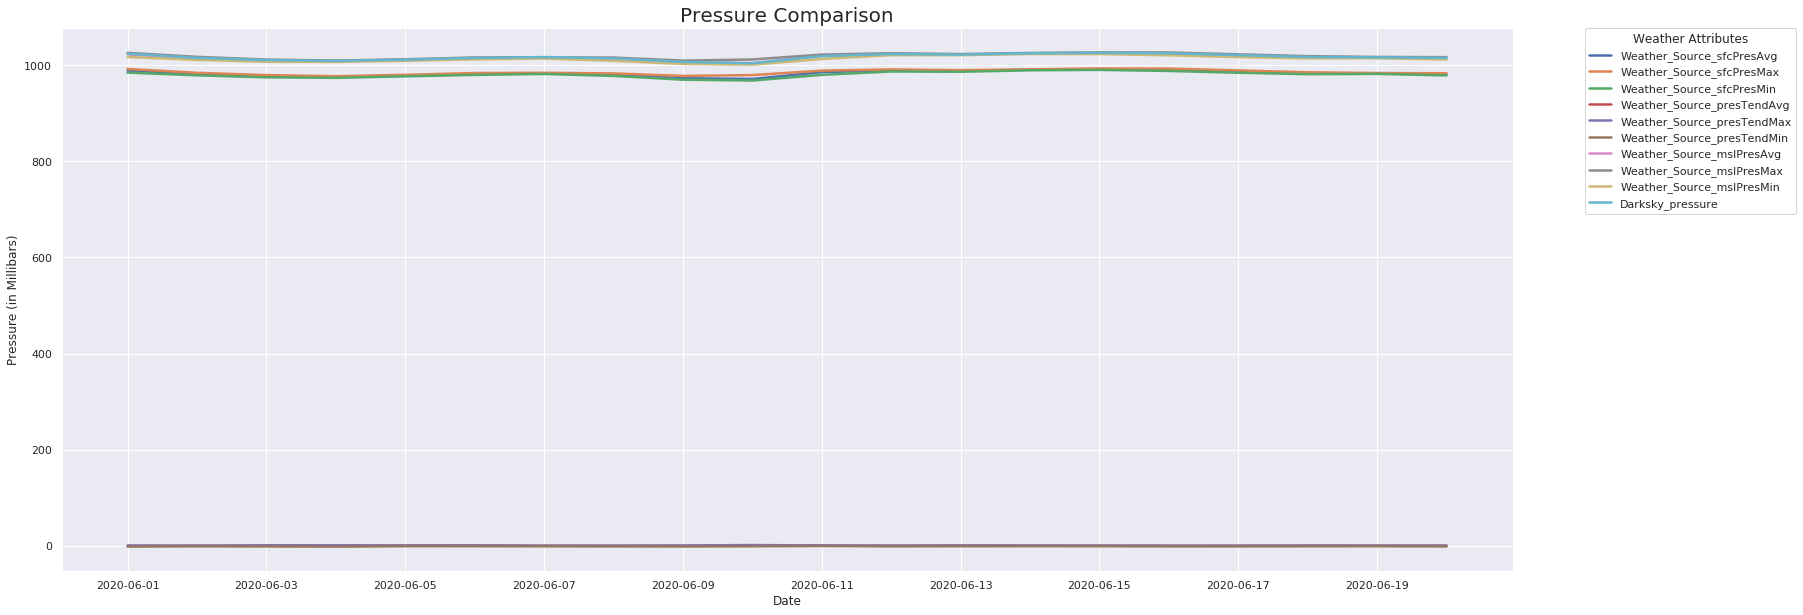

In [19]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','sfcPresAvg', 'sfcPresMax', 'sfcPresMin', 'presTendAvg', 'presTendMax', 'presTendMin', 'mslPresAvg', 'mslPresMax', 'mslPresMin', 'pressure']], ['Date']))
    new_labels = ["Weather_Source_sfcPresAvg","Weather_Source_sfcPresMax","Weather_Source_sfcPresMin","Weather_Source_presTendAvg",'Weather_Source_presTendMax','Weather_Source_presTendMin','Weather_Source_mslPresAvg',
                  'Weather_Source_mslPresMax', 'Weather_Source_mslPresMin', "Darksky_pressure"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Pressure (in Millibars)',title="Pressure Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## **Weather Source Dark-sky Humidity Comparison**

In [20]:
# bring humidity to equal scale
merged_data['humidity'] = merged_data['humidity']*100

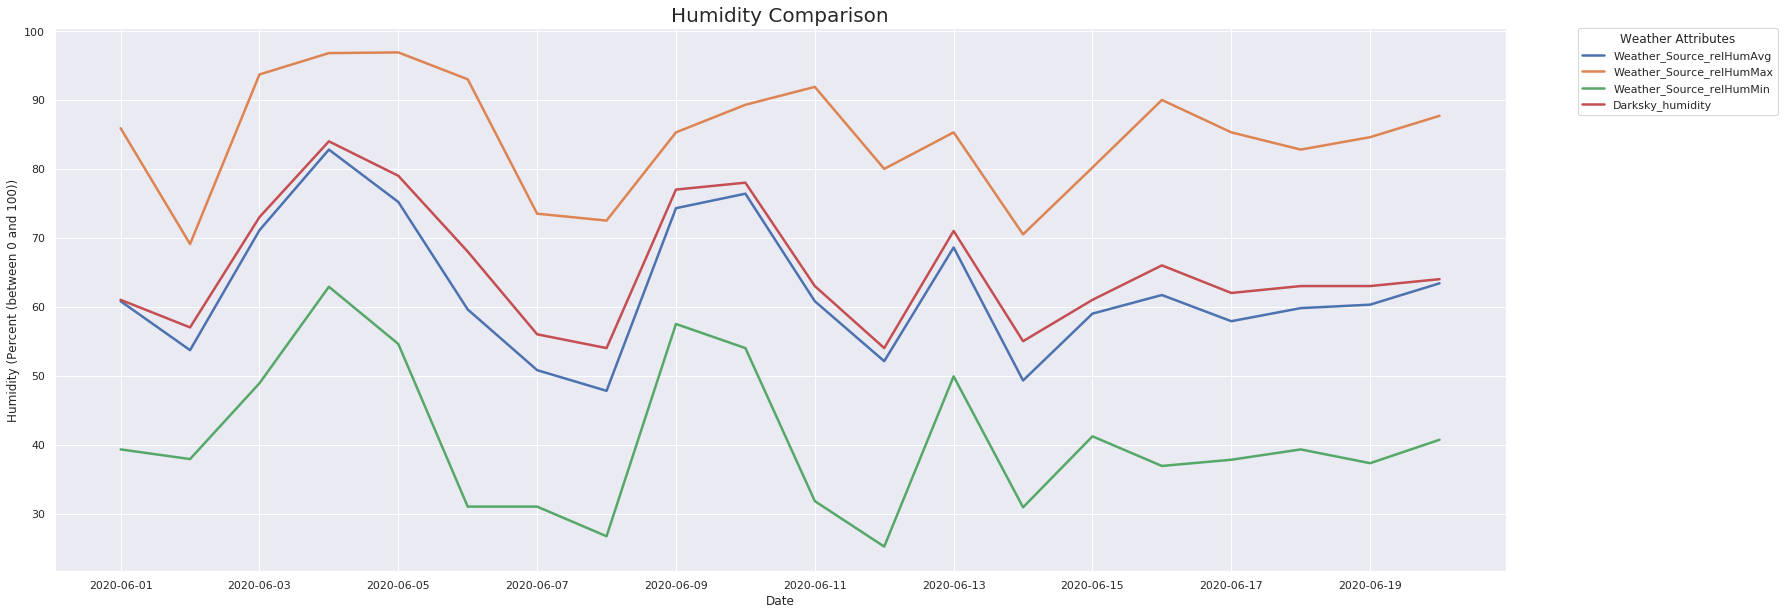

In [21]:
sns.set(rc={'figure.figsize':(26,10)})
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','relHumAvg', 'relHumMax', 'relHumMin', 'humidity']], ['Date']))
    new_labels = ["Weather_Source_relHumAvg","Weather_Source_relHumMax","Weather_Source_relHumMin","Darksky_humidity"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Humidity (Percent (between 0 and 100))',title="Humidity Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')